# LIBS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# UTILS

## FUCTIONS

In [2]:
def get_values_statistics(df, column: str)-> tuple:
    max_value = df[column].max()
    min_value = df[column].min()
    mean_value = df[column].mean()
    return (max_value, min_value, mean_value)

def boxplot(df, column: str, title: str = '')-> None:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[column], vert=False)
    plt.title(title)
    plt.show()

def violinplot(df, column: str, title: str = '', x_range=None)-> None:
    plt.figure(figsize=(6, 3))
    plt.violinplot(df[column], vert=False)
    plt.xlabel(column)
    plt.title(title)
    if x_range is not None:
        plt.xlim(x_range)
        
    plt.show()

def scatter_plot(df, column_x: str, column_y: str, label_x=None, label_y=None, title='Gráfico de Dispersão', x_range=None, y_range=None):
    if label_x is None:
        label_x = column_x

    if label_y is None:
        label_y = column_y

    plt.figure(figsize=(10, 4))
    plt.scatter(df[column_x], df[column_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    
    if x_range is not None:
        plt.xlim(x_range)
    
    if y_range is not None:
        plt.ylim(y_range)
        
    plt.grid(True)
    plt.show()
    
def bar_plot(df, column_x: str, column_y: str, label_x: str=None, label_y: str=None, title: str='Gráfico de Barras')->None:
    if label_x is None:
        label_x = column_x

    if label_y is None:
        label_y = column_y

    plt.figure(figsize=(10, 6))
    plt.bar(df[column_x], df[column_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.xticks(rotation=90)  
    plt.grid(True)
    plt.show()

def bar_plot_custom_intervals(data, column: str, intervals=None, interval_size=50, xlabel='Intervalos', ylabel='Contagem', title='Contagem de Valores por Intervalo'):
    
    data = data.dropna(subset=[column])
    data[column] = data[column].astype(int)

    if intervals:
        custom_intervals = pd.IntervalIndex.from_tuples(intervals)
        bins = custom_intervals
    else:
        bins = range(0, data[column].max() + interval_size, interval_size)

    intervals = pd.cut(data[column], bins=bins)
    counts = intervals.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', width=0.8)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(False)
    
    for i, val in enumerate(counts):
        plt.text(i, val + 0.2, str(val), ha='center', va='bottom')
    
    plt.show()
    

# ANALYSIS

## RESULTS ANALYSIS

#### TREATS  

In [3]:
resutls = pd.read_csv('../dataset/dados_tratados.csv', sep=';')
resutls.head()

,Repositorio,Nome,Estrelas,Anos,nº Releases,média CBO,desvio padão CBO,média LCOM,desvio padão LCOM,DIT máximo,LOC Total
0,Snailclimb/JavaGuide,JavaGuide,141978,5.88,0,NaN,NaN,NaN,NaN,NaN,NaN
1,GrowingGit/GitHub-Chinese-Top-Charts,GitHub-Chinese-Top-Charts,86585,4.55,0,0.000000,0.000000,0.000000,0.000000,1.0,5.0
2,iluwatar/java-design-patterns,java-design-patterns,86114,9.62,0,3.335946,2.604419,2.035834,6.789084,6.0,34248.0
3,MisterBooo/LeetCodeAnimation,LeetCodeAnimation,74852,5.30,0,1.000000,0.000000,0.000000,0.000000,1.0,78.0
4,macrozheng/mall,mall,74810,5.97,3,3.931579,4.950338,1110.748684,8150.195447,4.0,100873.0


In [4]:
print(f'Número de linhas: {resutls.shape[0]} - Número de colunas: {resutls.shape[1]} \n')
print('Total de valores vazios por colunas ')
resutls.isna().sum()

Número de linhas: 1000 - Número de colunas: 11 

Total de valores vazios por colunas 


Repositorio           0
Nome                  0
Estrelas              0
Anos                  0
nº Releases           0
média CBO            36
desvio padão CBO     36
média LCOM           36
desvio padão LCOM    36
DIT máximo           36
LOC Total            36
dtype: int64

In [5]:
resutls.describe()

,Estrelas,Anos,nº Releases,média CBO,desvio padão CBO,média LCOM,desvio padão LCOM,DIT máximo,LOC Total
count,1000.000000,1000.000000,1000.000000,964.000000,964.000000,964.000000,9.640000e+02,964.000000,9.640000e+02
mean,7747.740000,8.286260,26.339000,5.244432,6.031862,438.487708,3.544130e+04,28.515560,8.375640e+04
std,9887.228341,2.762995,48.285832,1.672070,2.480842,7262.504187,7.088327e+05,179.500087,2.880056e+05
min,2446.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000e+00
25%,3429.000000,6.700000,0.000000,4.304932,4.692588,10.006834,3.402155e+01,3.000000,2.714000e+03
50%,4604.000000,8.250000,9.000000,5.190476,5.868399,23.055858,1.118130e+02,5.000000,1.236350e+04
75%,8129.250000,10.250000,29.000000,6.182289,7.123100,49.448100,3.607417e+02,11.000000,4.376225e+04
max,141978.000000,15.200000,344.000000,13.892857,24.956161,154652.742157,1.548099e+07,3734.000000,4.455723e+06


In [6]:
data = resutls.dropna()
print(f'Número de linhas descartadas: {resutls.shape[0] - data.shape[0]}  \n')

Número de linhas descartadas: 36  



### GRAFHS

#### REALEASES ANALYSIS

In [7]:
releases_column = 'nº Releases'

max_cbo, min_cbo, mean_cbo = get_values_statistics(df=data, column=releases_column)
print(f'Para a coluna: {releases_column}')
print('MAX: {} - MIN: {} - mean: {:.2f}'.format(max_cbo, min_cbo, mean_cbo))

Para a coluna: nº Releases
MAX: 344 - MIN: 0 - mean: 26.29


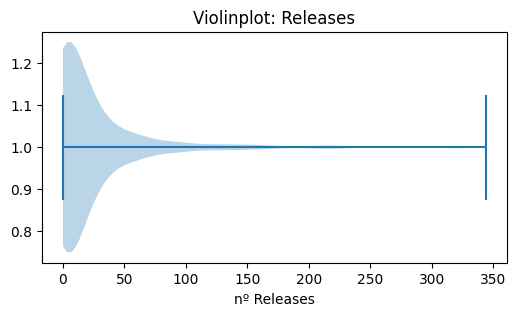

In [8]:
violinplot(df=data, column=releases_column, title='Violinplot: Releases')

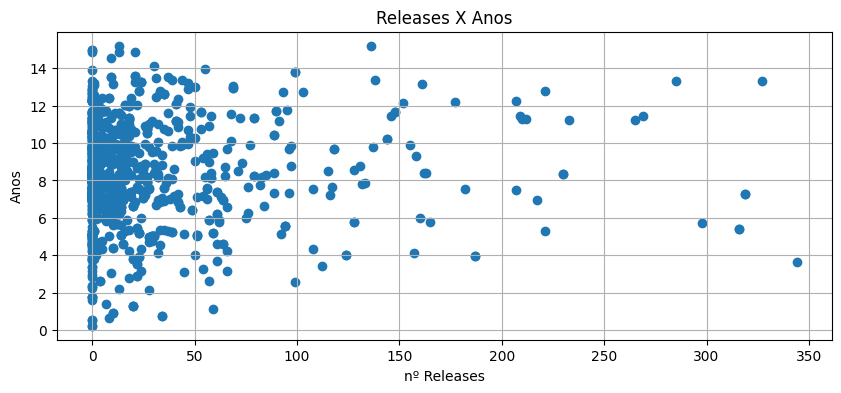

In [9]:
scatter_plot(df=data, column_x=releases_column, column_y='Anos', title='Releases X Anos')

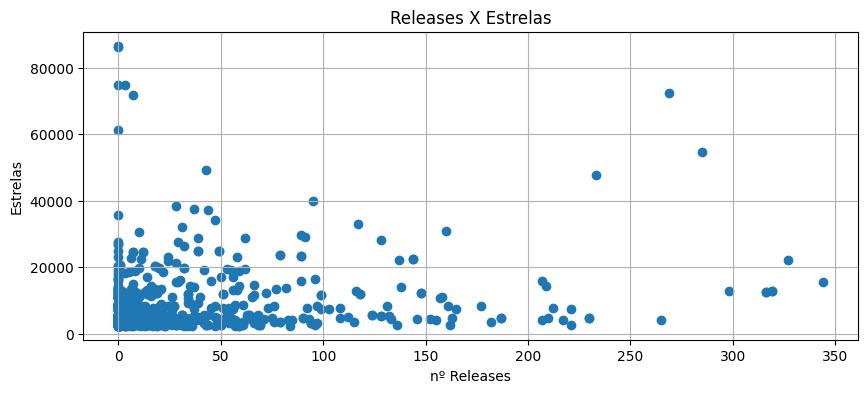

In [10]:
scatter_plot(df=data, column_x=releases_column, column_y='Estrelas', title='Releases X Estrelas')

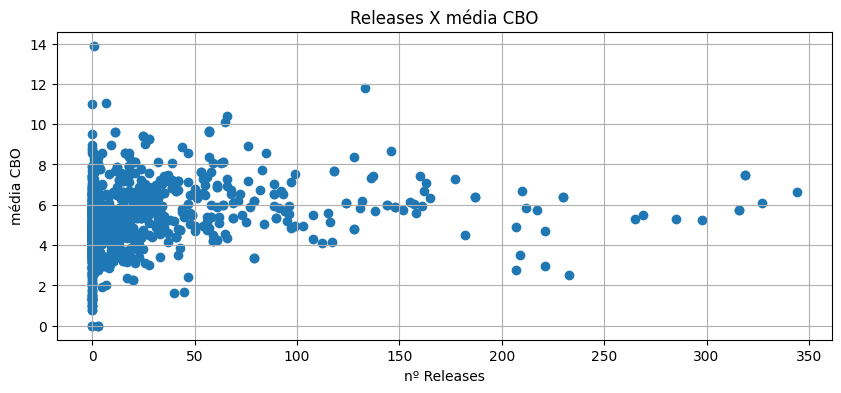

In [11]:
scatter_plot(df=data, column_x=releases_column, column_y='média CBO', title='Releases X média CBO')

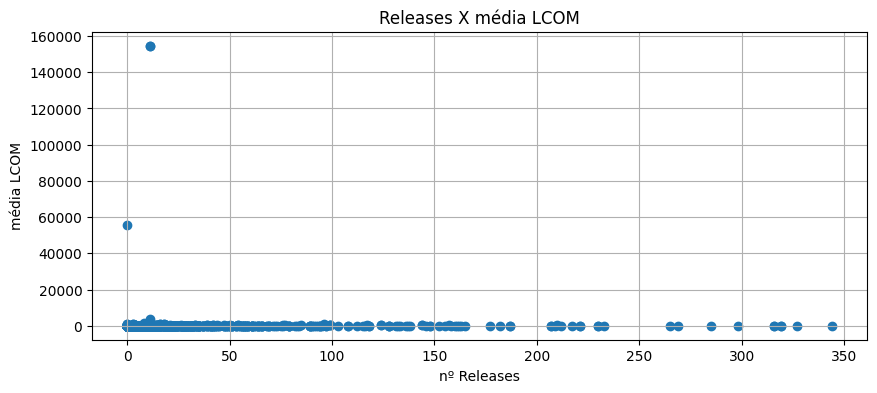

In [12]:
scatter_plot(df=data, column_x=releases_column, column_y='média LCOM', title='Releases X média LCOM')

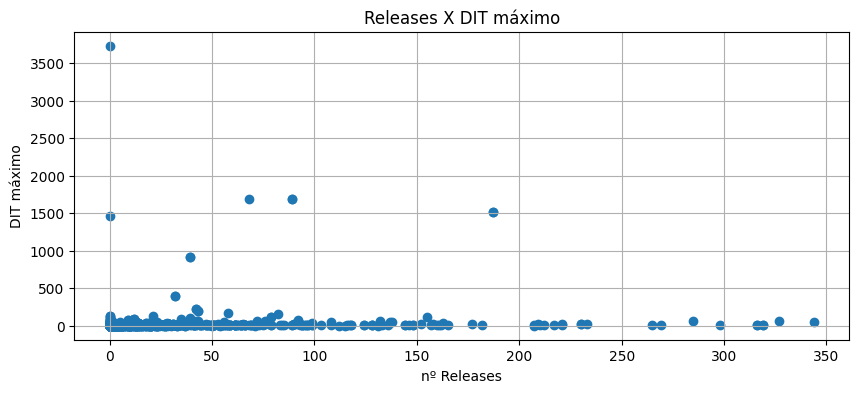

In [13]:
scatter_plot(df=data, column_x=releases_column, column_y='DIT máximo', title='Releases X DIT máximo')

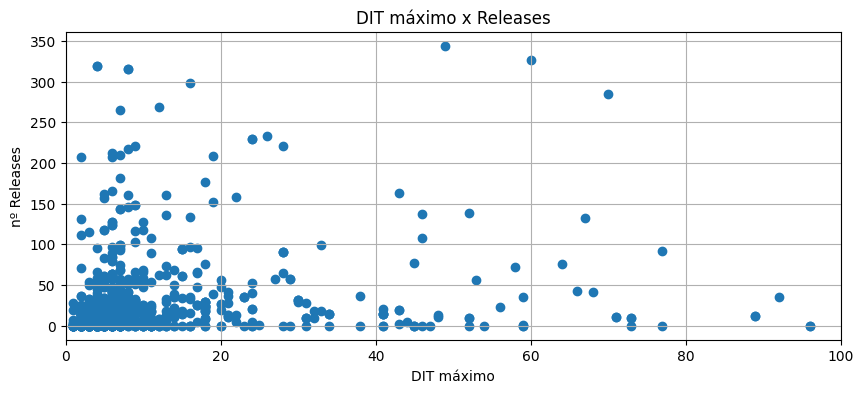

In [14]:
scatter_plot(df=data, column_y=releases_column, column_x='DIT máximo', title='DIT máximo x Releases', x_range=(0,100))

#### LOC ANALYSIS

In [15]:
loc_column = 'LOC Total'

max_dit, min_dit, mean_dit = get_values_statistics(df=data, column=loc_column)
print(f'Para a coluna: {loc_column}')
print('MAX: {} - MIN: {} - mean: {:.2f}'.format(max_dit, min_dit, mean_dit))

Para a coluna: LOC Total
MAX: 4455723.0 - MIN: 2.0 - mean: 83756.40


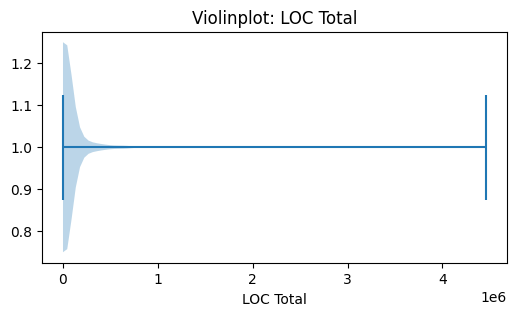

In [16]:
violinplot(data, column=loc_column, title='Violinplot: LOC Total')

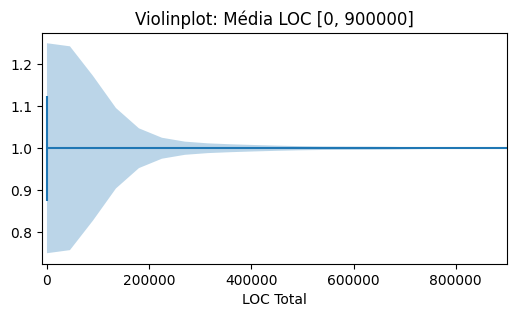

In [17]:
violinplot(df=data, column=loc_column, title='Violinplot: Média LOC [0, 900000]', x_range=(-10000,900000))

#### CBO ANALYSIS

##### General

In [18]:
cbo_mean_column = 'média CBO'
cbo_standard_column = 'desvio padão CBO'

max_cbo, min_cbo, mean_cbo = get_values_statistics(df=data, column=cbo_mean_column)
print(f'Para a coluna: {cbo_mean_column}')
print('MAX: {:.2f} - MIN: {} - mean: {:.2f}'.format(max_cbo, min_cbo, mean_cbo))

max_std,min_std,mean_std = get_values_statistics(df=data, column=cbo_standard_column)
print(f'\nPara a coluna: {cbo_standard_column}')
print('MAX: {:.2f} - MIN: {} - mean: {:.2f}'.format(max_std,min_std,mean_std))



Para a coluna: média CBO
MAX: 13.89 - MIN: 0.0 - mean: 5.24

Para a coluna: desvio padão CBO
MAX: 24.96 - MIN: 0.0 - mean: 6.03


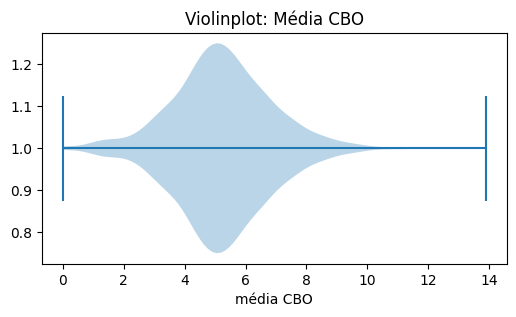

In [19]:
violinplot(df=data, column=cbo_mean_column, title='Violinplot: Média CBO')

##### CBO x Anos

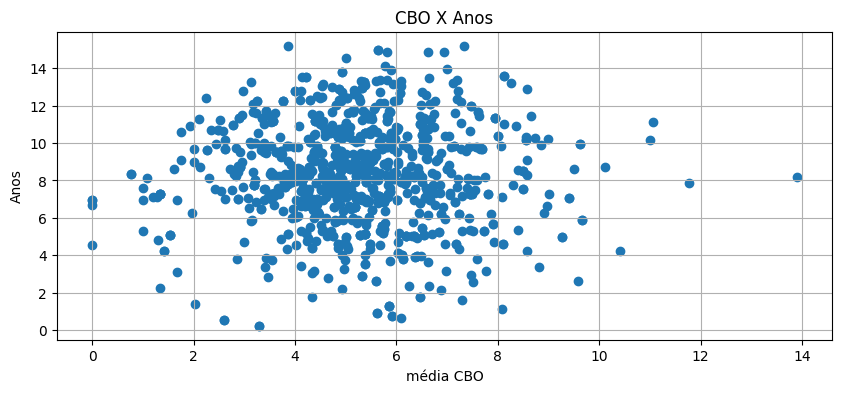

In [20]:
scatter_plot(df=data, column_x=cbo_mean_column, column_y='Anos', title='CBO X Anos')

##### CBO x Estrelas

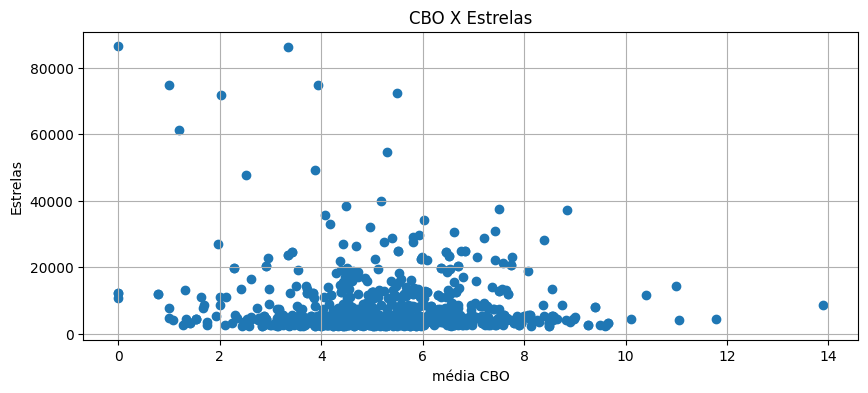

In [21]:
scatter_plot(df=data, column_x=cbo_mean_column, column_y='Estrelas', title='CBO X Estrelas')

##### CBO x Releases

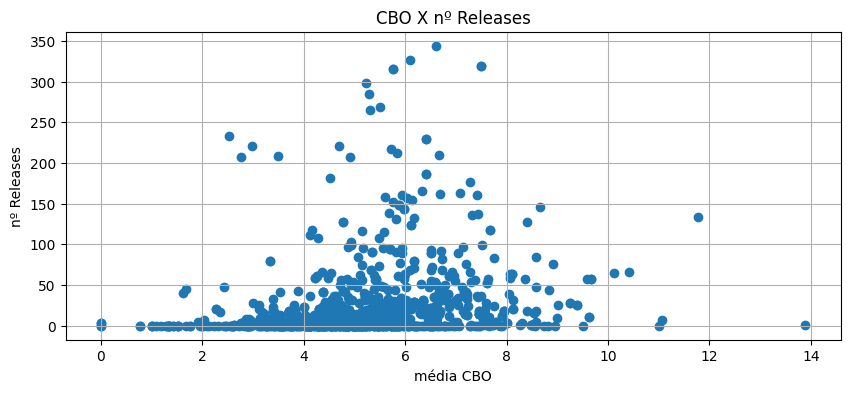

In [22]:
scatter_plot(df=data, column_x=cbo_mean_column, column_y='nº Releases', title='CBO X nº Releases')

##### CBO x LOC 

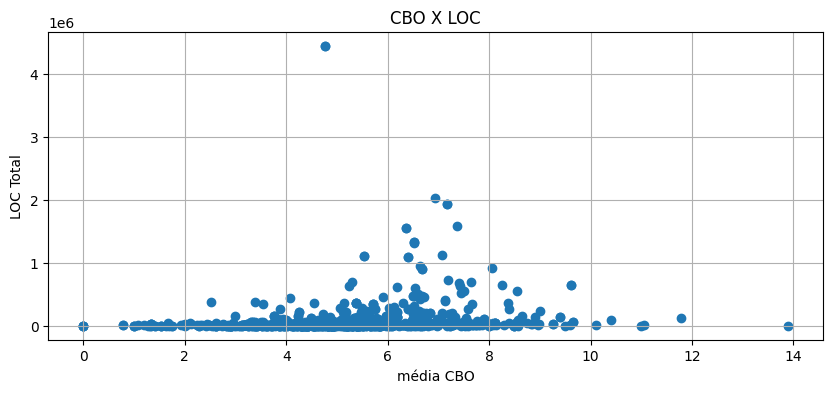

In [23]:
scatter_plot(df=data, column_x=cbo_mean_column, column_y='LOC Total', title='CBO X LOC')

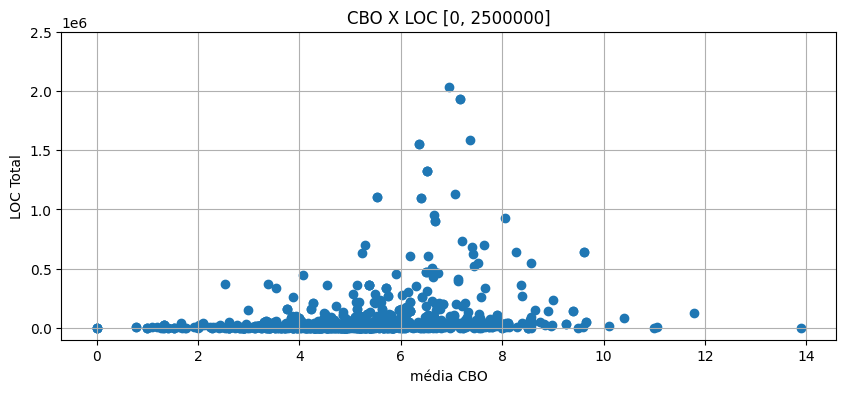

In [24]:
scatter_plot(df=data, column_x=cbo_mean_column, column_y='LOC Total', title='CBO X LOC [0, 2500000]', y_range=(-100000, 2500000))

#### LCOM ANALYSIS

##### GENERAL

In [25]:
lcom_mean_column = 'média LCOM'
lcom_standard_column = 'desvio padão LCOM'

max_cbo, min_cbo, mean_cbo = get_values_statistics(df=data, column=lcom_mean_column)
print(f'Para a coluna: {lcom_mean_column}')
print('MAX: {:.2f} - MIN: {} - mean: {:.2f}'.format(max_cbo, min_cbo, mean_cbo))

max_std,min_std,mean_std = get_values_statistics(df=data, column=lcom_standard_column)
print(f'\nPara a coluna: {lcom_standard_column}')
print('MAX: {:.2f} - MIN: {} - mean: {:.2f}'.format(max_std,min_std,mean_std))

Para a coluna: média LCOM
MAX: 154652.74 - MIN: 0.0 - mean: 438.49

Para a coluna: desvio padão LCOM
MAX: 15480986.86 - MIN: 0.0 - mean: 35441.30


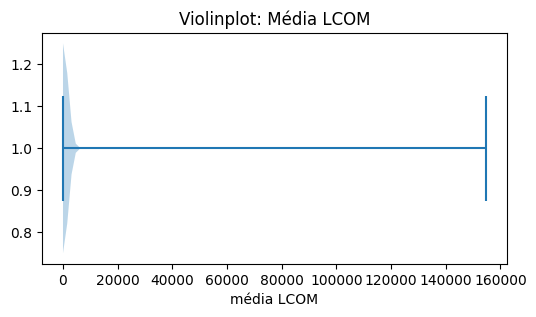

In [26]:
violinplot(df=data, column=lcom_mean_column, title='Violinplot: Média LCOM')

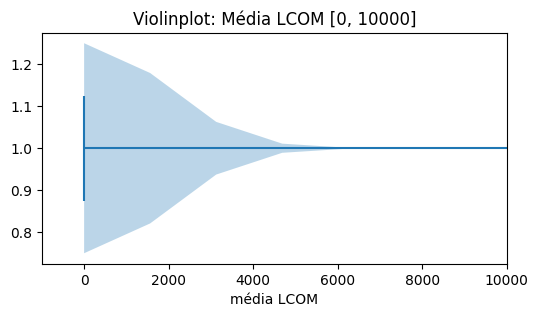

In [27]:
violinplot(df=data, column=lcom_mean_column, title='Violinplot: Média LCOM [0, 10000]', x_range=(-1000,10000))

##### LCOM x ANOS

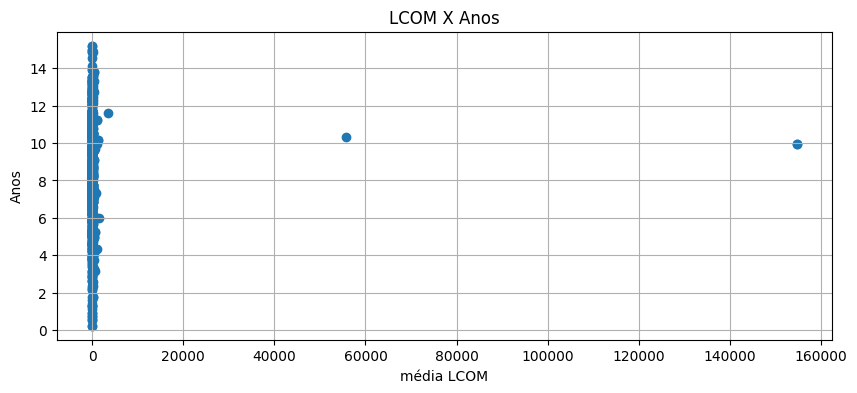

In [28]:
scatter_plot(df=data, column_x=lcom_mean_column, column_y='Anos', title='LCOM X Anos')

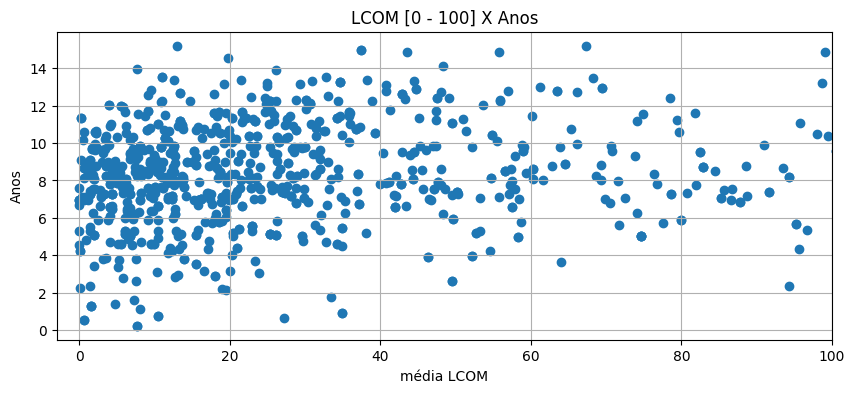

In [29]:
scatter_plot(df=data, column_x=lcom_mean_column, column_y='Anos', title='LCOM [0 - 100] X Anos', x_range=(-3,100))

##### LCOM X Estrelas

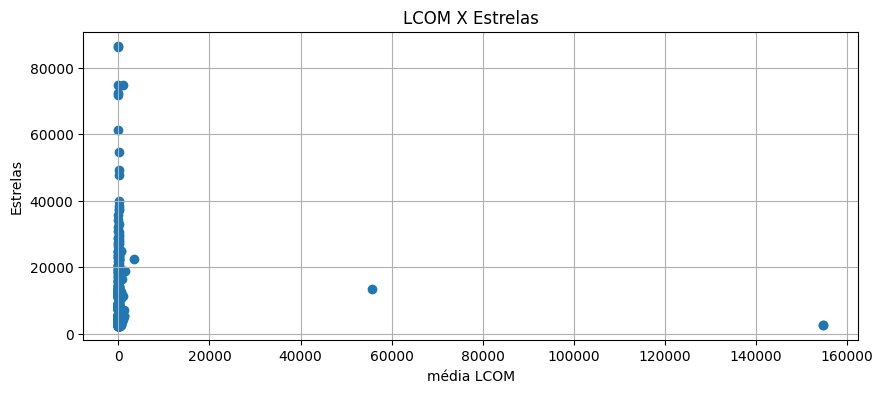

In [30]:
scatter_plot(df=data, column_x=lcom_mean_column, column_y='Estrelas', title='LCOM X Estrelas')

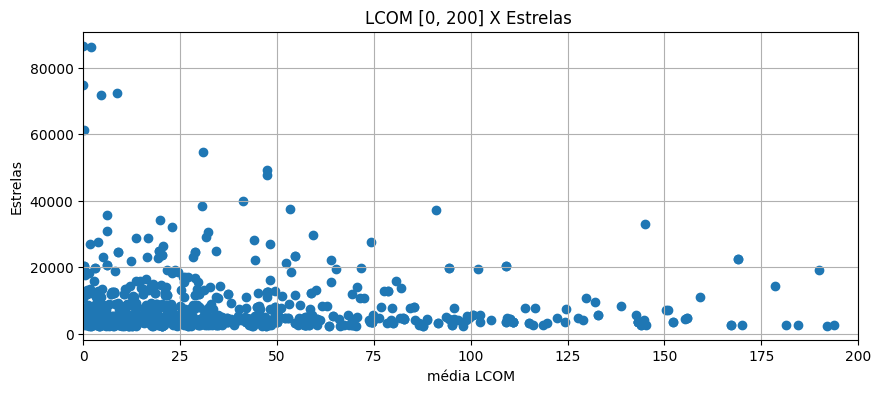

In [31]:
scatter_plot(df=data, column_x=lcom_mean_column, column_y='Estrelas', title='LCOM [0, 200] X Estrelas ', x_range=(0,200))

##### LCOM X Releases

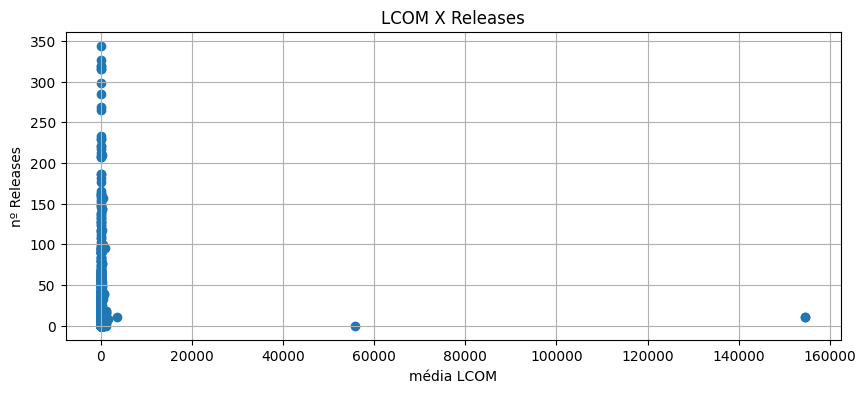

In [32]:
scatter_plot(df=data, column_x=lcom_mean_column, column_y='nº Releases', title='LCOM X Releases')

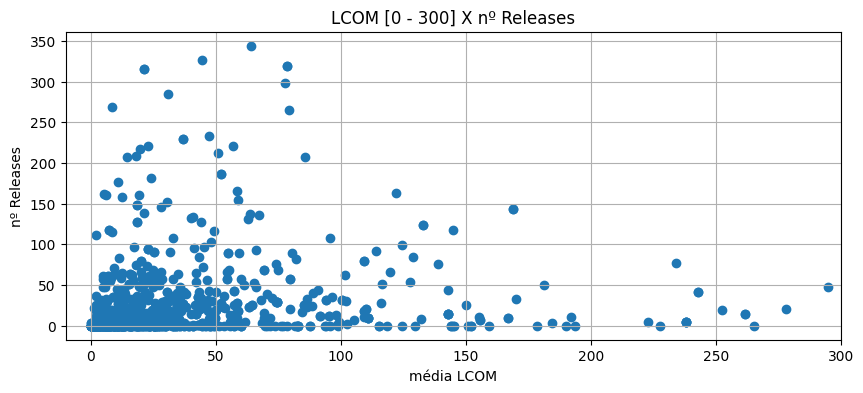

In [33]:
scatter_plot(df=data, column_x=lcom_mean_column, column_y='nº Releases', title='LCOM [0 - 300] X nº Releases', x_range=(-10, 300))

##### LCOM x LOC

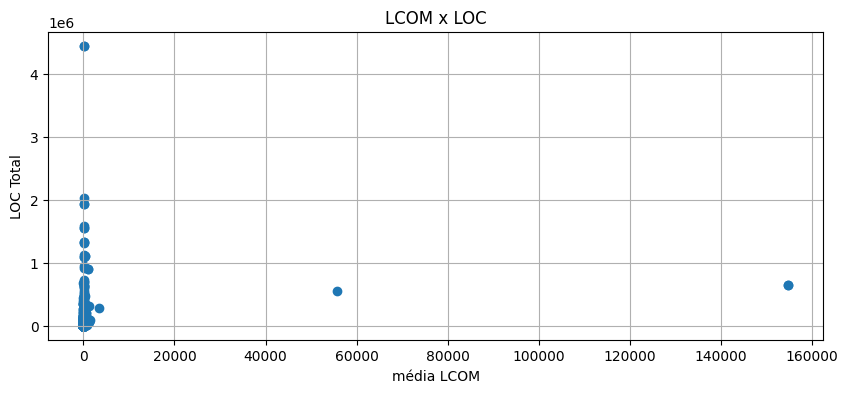

In [34]:
scatter_plot(data, column_x=lcom_mean_column, column_y='LOC Total', title='LCOM x LOC')

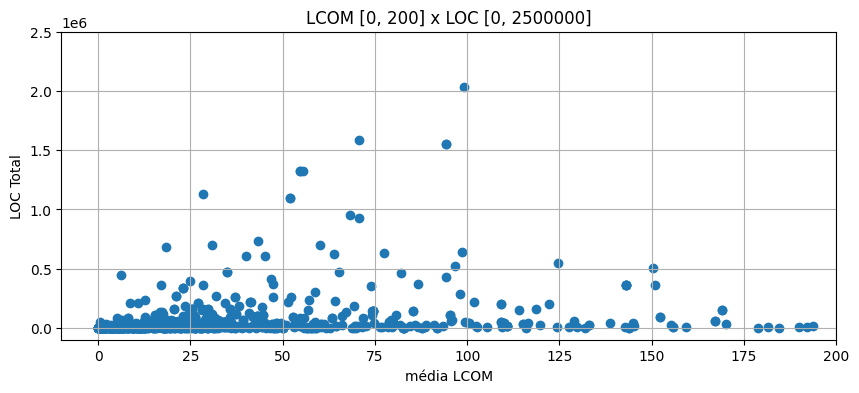

In [35]:
scatter_plot(data, column_x=lcom_mean_column, column_y='LOC Total', title='LCOM [0, 200] x LOC [0, 2500000]', x_range=(-10, 200), y_range=(-100000, 2500000))

#### DIT ANALYSIS

##### General

In [36]:
dit_column = 'DIT máximo'

max_dit, min_dit, mean_dit = get_values_statistics(df=data, column=dit_column)
print(f'Para a coluna: {dit_column}')
print('MAX: {} - MIN: {} - mean: {:.2f}'.format(max_dit, min_dit, mean_dit))

Para a coluna: DIT máximo
MAX: 3734.0 - MIN: 1.0 - mean: 28.52


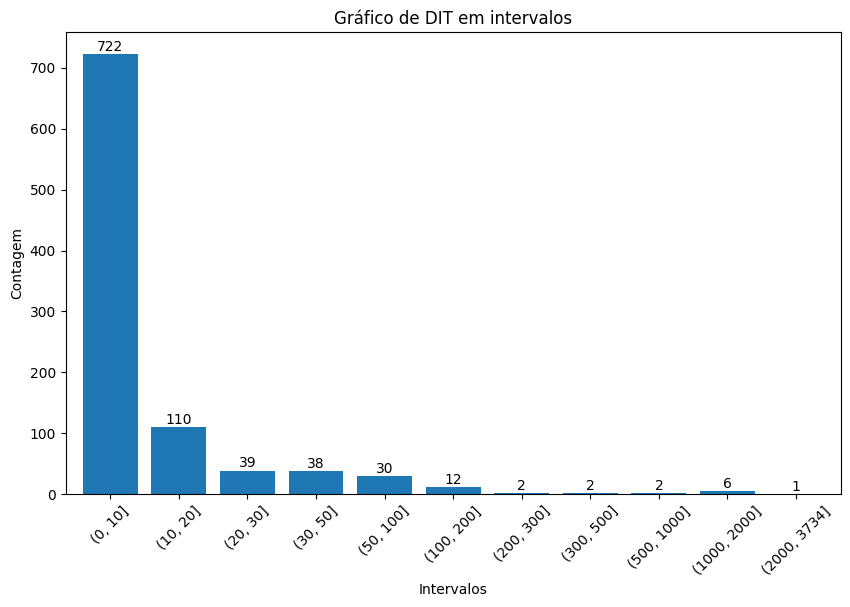

In [37]:

intervals = [(0, 10), (10, 20), (20, 30), (30, 50), (50, 100), (100,200), (200, 300),(300,500), (500,1000), (1000,2000), (2000, int(max_dit))]
bar_plot_custom_intervals(data=data, column='DIT máximo', intervals=intervals, title='Gráfico de DIT em intervalos')

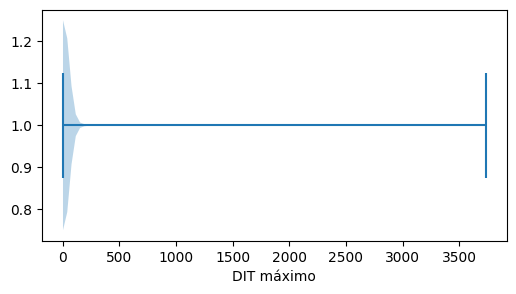

In [38]:
violinplot(df=data, column=dit_column)

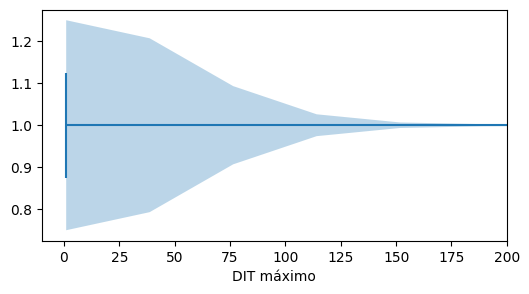

In [39]:
violinplot(df=data, column=dit_column, x_range=(-10, 200))

##### DIT x Anos

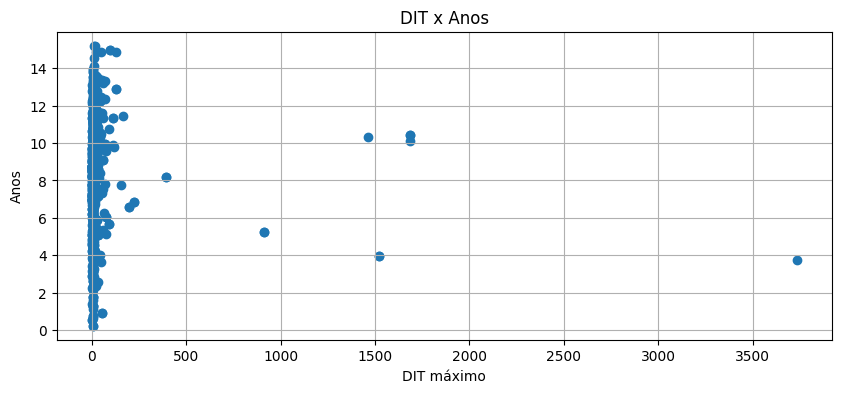

In [40]:
scatter_plot(df=data, column_x=dit_column, column_y='Anos', title='DIT x Anos')

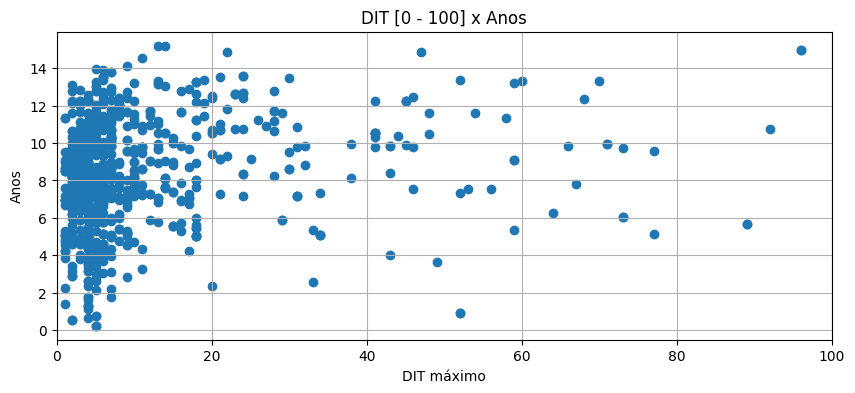

In [41]:
scatter_plot(df=data, column_x=dit_column, column_y='Anos', title='DIT [0 - 100] x Anos', x_range=(0,100))

##### DIT x Estrelas

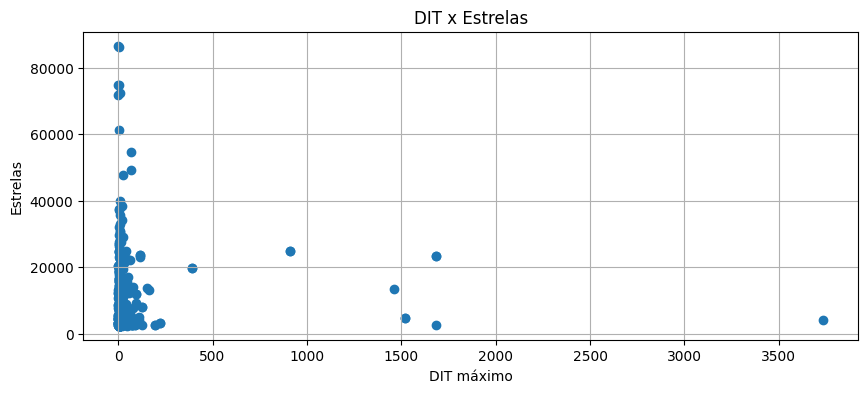

In [42]:
scatter_plot(df=data, column_x=dit_column, column_y='Estrelas', title='DIT x Estrelas')

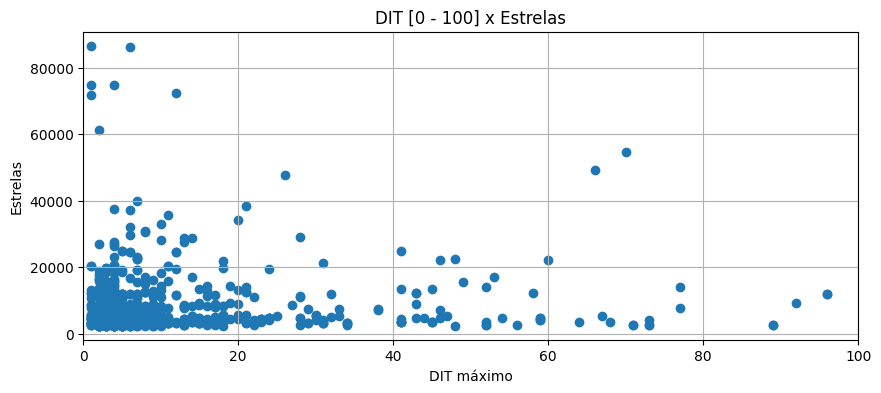

In [43]:
scatter_plot(df=data, column_x=dit_column, column_y='Estrelas', title='DIT [0 - 100] x Estrelas', x_range=(0,100))

##### DIT x Releases

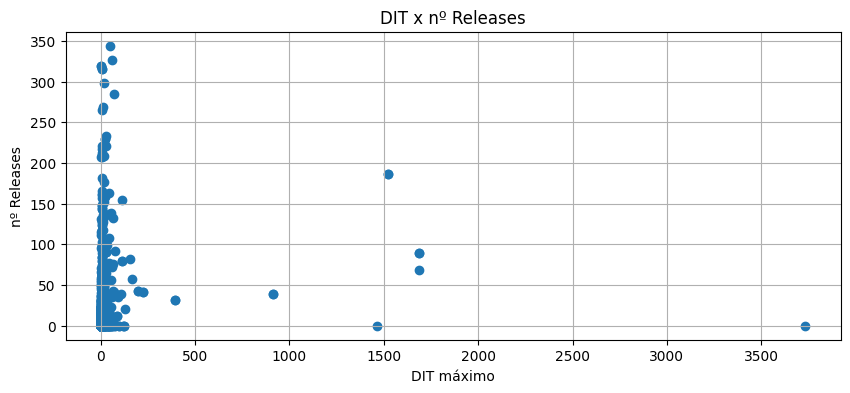

In [44]:
scatter_plot(data, column_x=dit_column, column_y='nº Releases', title='DIT x nº Releases')

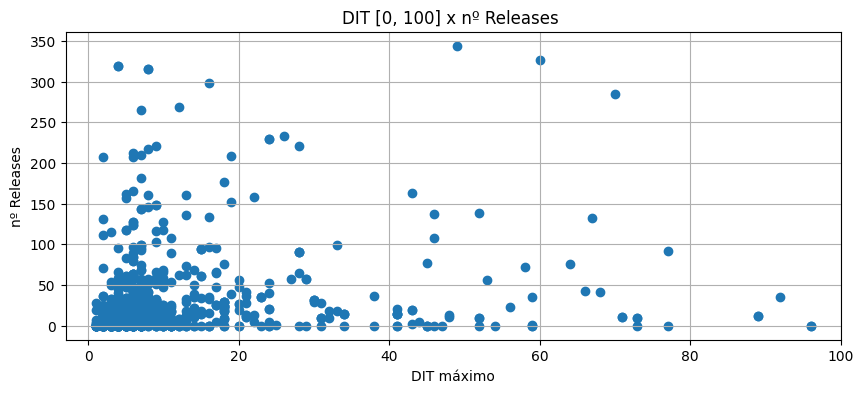

In [45]:
scatter_plot(data, column_x=dit_column, column_y='nº Releases', title='DIT [0, 100] x nº Releases ', x_range=(-3,100))

##### DIT x LOC

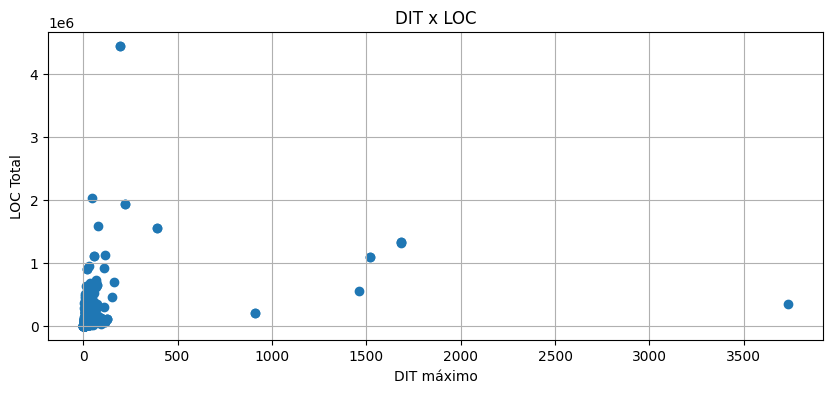

In [46]:
scatter_plot(data, column_x=dit_column, column_y='LOC Total', title='DIT x LOC')

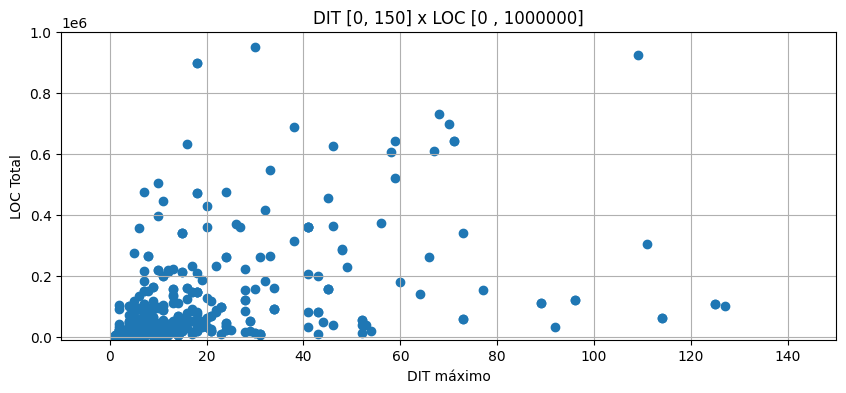

In [47]:
scatter_plot(data, column_x=dit_column, column_y='LOC Total', title='DIT [0, 150] x LOC [0 , 1000000]', x_range=(-10, 150), y_range=(-10000, 1000000))

## ERROR ANALYSIS

In [48]:
errors = pd.read_csv('../dataset/repo_with_erros.csv', sep=';')

print(f'Total de erros: {errors.shape[0]} \n')
errors.head()

Total de erros: 23 



,nameWithOwner,error
0,NationalSecurityAgency_ghidra,No columns to parse from file
1,Anuken_Mindustry,No columns to parse from file
2,openjdk_jdk,No columns to parse from file
3,openzipkin_zipkin,No columns to parse from file
4,eclipse-vertx_vert.x,No columns to parse from file


In [49]:
type_errors = errors['error'].unique()
print('Erros encontrados ao rodar o CK nos repositórios clonados \n')
for error in type_errors:
    count = errors[errors['error'] == error].shape[0]  
    print(f'error: {error} || quant: {count}')

Erros encontrados ao rodar o CK nos repositórios clonados 

error: No columns to parse from file || quant: 14
error: 'utf-8' codec can't decode byte 0xc1 in position 145935: invalid start byte || quant: 1
error: 'utf-8' codec can't decode byte 0xe9 in position 747: invalid continuation byte || quant: 1
error: 'utf-8' codec can't decode byte 0xc4 in position 80672: invalid continuation byte || quant: 2
error: 'utf-8' codec can't decode byte 0xe9 in position 6915: invalid continuation byte || quant: 1
error: 'utf-8' codec can't decode byte 0xa0 in position 2411: invalid start byte || quant: 1
error: 'utf-8' codec can't decode byte 0xe6 in position 15043: invalid continuation byte || quant: 1
error: 'utf-8' codec can't decode bytes in position 231993-231994: invalid continuation byte || quant: 2
